#### INTEGRANTES:

Adriano Vieira Almeida de Mello - RM: 552211

Gustavo Santana Pereira - RM: 98935

Isabela Victória de Novais Romanato - RM: 550234

RAFAEL MENDES DE LIMA - RM: 99523

RENAN MACEDO CARRARA COIMBRA - RM: 552187

#**Projeto Cartão de Crédito**


In [536]:
# IMPORTAR BIBLIOTECAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm

In [537]:
# LER DATASET
df = pd.read_csv('/content/drive/MyDrive/datasets/dadosclientes.csv')

In [538]:
# VISUALIZAR DADOS PARA ANÁLISE
df.head()

,CPF,Renda mensal,Sexo,ano de nascimento,Gasto médio por visita,Score bureau crédito,Feedback cliente,Comprou Cartão,Receita adicional
0,876.377.755-00,"8476,18",feminino,2000.0,"131,86","966,5674364",NaN,1,"55,8383277"
1,271.830.308-57,"9539,46",feminino,2004.0,"169,48","944,2026368",NaN,1,"73,75760079"
2,831.506.705-27,"9687,94",feminino,1986.0,"107,66","921,9380123",NaN,1,"67,1282298"
3,083.631.825-08,"8632,02",feminino,2001.0,"160,11","961,8014145",NaN,1,"76,83238539"
4,520.617.446-72,"8477,20",feminino,1981.0,"190,46","997,8492315",NaN,1,"52,02609054"


In [539]:
# EXCLUIR COLUNA QUE NÃO TEM INFLUÊNCIA NO MODELO
df = df.drop(columns=['CPF'])

In [540]:
# EXCLUIR NANS
df = df.dropna(subset=['Sexo', 'ano de nascimento', 'Renda mensal', 'Gasto médio por visita', 'Score bureau crédito'])

In [541]:
# ANÁLISE COLUNA 'SEXO'

df['Sexo'].value_counts()

Sexo
feminino     175
masculino     32
Name: count, dtype: int64

In [542]:
# TRATAMENTO DAS VARIÁEIS X

df['Sexo'] = df['Sexo'].map({'feminino': 1, 'masculino': 0})
df.rename(columns={'Sexo': 'sexo'}, inplace=True)
# df['ano de nascimento'] = pd.to_datetime(df['ano de nascimento']).dt.year

In [543]:
# OBSERVAR RESULTADO DO TRATAMENTO

df['sexo'].value_counts()

sexo
1    175
0     32
Name: count, dtype: int64

In [544]:
# TRATAMENTO VARIÁVEIS COM , -> .

df['Receita adicional'] = df['Receita adicional'].apply(lambda x: float(x.replace('R$', '').replace('.', '').replace(',', '.')))
df['Renda mensal'] = df['Renda mensal'].apply(lambda x: float(x.replace('R$', '').replace('.', '').replace(',', '.')))
df['Gasto médio por visita'] = df['Gasto médio por visita'].apply(lambda x: float(x.replace('R$', '').replace('.', '').replace(',', '.')))
df['Score bureau crédito'] = df['Score bureau crédito'].apply(lambda x: float(x.replace('R$', '').replace('.', '').replace(',', '.')))

In [545]:
# VARIÁVEIS X e Y (interesse)
X = df[['sexo', 'ano de nascimento','Renda mensal', 'Gasto médio por visita', 'Score bureau crédito']].to_numpy()
Y = df[['Comprou Cartão', 'Receita adicional']].to_numpy()

In [546]:
# MODELO REGRESSÃO LINEAR
model = LinearRegression(n_jobs=None, fit_intercept=True)
model.fit(X, Y)
model.score(X, Y)

0.8714296974340237

In [547]:
# TREINO E TESTE
X_train = df[['sexo', 'ano de nascimento','Renda mensal', 'Gasto médio por visita', 'Score bureau crédito']].to_numpy()
Y_train = df[['Comprou Cartão', 'Receita adicional']].to_numpy()

X_test = df[['sexo', 'ano de nascimento','Renda mensal', 'Gasto médio por visita', 'Score bureau crédito']].to_numpy()
Y_test = df[['Comprou Cartão', 'Receita adicional']].to_numpy()

model = LinearRegression()
model.fit(X_train, Y_train)

# RESULTADO
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.8714296974340237
0.8714296974340237


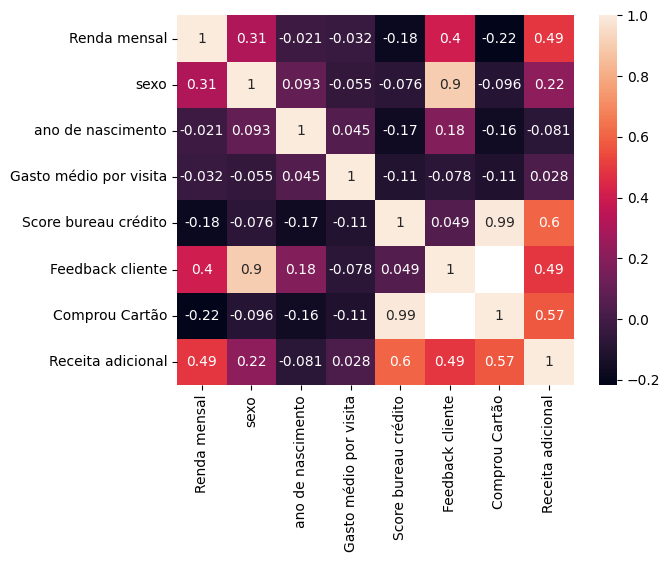

In [548]:
# Matriz de correlação

import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)
plt.show()


In [554]:
# prompt: todos as informações na coluna  Renda mensal

df['Renda mensal'].value_counts()


Renda mensal
8476.18     1
11770.86    1
10036.92    1
11313.26    1
10759.03    1
           ..
8992.10     1
9175.28     1
9246.62     1
9477.50     1
10489.56    1
Name: count, Length: 207, dtype: int64